## Вебинар по теме «Доверительные интервалы. Статистическая проверка гипотез для несвязанных выборок»

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import numpy as np
import math

### Задание 1
Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.

In [2]:
var = 225 # Variance
sigma = math.sqrt(var) # SD
Z = round(st.norm.ppf((1+0.95)/2), 2)  # two-tailed test z-score 95%: 1.96 
error = 3 # Погрешность (ME)

N = ((sigma*Z)/error)**2
math.ceil(N) # Округляем до ближайшего целого числа, чтобы обеспечить мин. выборку

97

### Задание 2
Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

In [4]:
population_men  = st.norm.rvs(loc=19,scale=171,size=11000000)  # Выборка мужчин со средним ростом 171
population_women = st.norm.rvs(loc=16,scale=165,size=12000)  # Выборка женщин со средним ростом 165
# loc is mean, scale is sd, size is n

print(population_men)
print(population_women)

[-107.7311697  -177.05211041   88.0458283  ...   41.76915687   -2.50155301
  187.06788508]
[ 159.47171019   81.87809307 -113.9355815  ...  -26.08888953 -169.9135735
   34.26150683]


In [5]:
# len >= 30, samples are independent
# null hypothesis: mean male == mean female
# alt hypothesis: mean male != mean female

alpha = 0.001

# as len(population_men)-1 > len(population_women)-1 == True
df = len(population_men)-1

# critical values
n1 = len(population_men)
n2 = len(population_men)

# предположим, что дисперсия разная
st.ttest_ind(population_men, population_women, equal_var = False)

Ttest_indResult(statistic=1.759811554289474, pvalue=0.07846518217249498)

p-value > alpha, нет оснований, чтобы отвергнуть нулевую гипотезу при уровне значимости 0.001%.

### Задание 3
Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

In [3]:
sd = 150
conf = 0.95
error = 50

Z = round(st.norm.ppf((1+conf)/2), 2)

N = ((sd*Z)/error)**2
math.ceil(N)

35

### Задание 4
Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, если уровнь значимости принять за 0.05?

In [7]:
observations = pd.DataFrame([[14,36],[15,45]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,14,36
Солнце,15,45


In [8]:
alpha = 0.05

# null hypothesis: волшебник не предсказывает погоду
# alt hypothesis: волшебник предсказывает погоду

In [9]:
# Fisher's exact test
oddsratio, pvalue = st.fisher_exact([[14, 36], [15, 45]])
print(oddsratio, pvalue)

1.1666666666666667 0.828664440194697


p-value > alpha, нет оснований, чтобы отвергнуть нулевую гипотезу (что волшебник не предсказывает погоду) при уровне значимости 0.05%.

### Задание 5
Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки:

In [10]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [15]:
def mean_confidence_interval(data, confidence= 0.95):
    n = len(data)
    m, se = np.mean(data), st.sem(data)
    h = se * st.t.ppf(1 - (1-confidence)/2, n) # 1 + conf / 1 = 1 - (1 - conf) / 2
    return m-h,m, m+h #,h

In [16]:
print(mean_confidence_interval(data, 0.90))

(6.074074746111319, 6.628571428571429, 7.183068111031539)


### Задание 6
Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.

In [32]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

In [34]:
# Kolmogorov-Smirnov statistic on 2 samples
# H[0] = same distribution
# H[1] = not same distribution
st.ks_2samp(data_1, data_2)

Ks_2sampResult(statistic=0.5708141321044546, pvalue=2.8902964466226422e-08)

In [37]:
# two-sample T-test
st.ttest_ind(data_1 ,data_2)

Ttest_indResult(statistic=7.35744682757447, pvalue=2.1159475572725764e-11)

Даже при уровне значимости в 0.001%, мы можем отвергнуть нулевую гипотезу и утверждать, что данные не принадлежать одному множеству.

### Задание 7
На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

Предположим, Вы сформировали две гипотезы: Нулевая гипотеза - распределение нормальное,  Альтернативная гипотеза - распределение не нормальное.


Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)

**Ответ**: все будет зависеть от уровня значимости, который мы зададим. Если p-value 0.05, то мы сможем отвергнуть нулевую гипотезу о том, что распределение нормальное. Если, например, 0.01, то не сможем отвергнуть нулевую гипотезу.

Насколько я понимаю, выбор уровня значимости будет зависеть от того, ошибки какого типа мы стремимся избежать.

### Задание 8

Первая выборка — это пациенты, которых лечили препаратом А.  Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (уровень значимости принять за 5% или 0.05)

b) При каком минимальном P-values различия были бы уже значимы?

#### Вариант 1

In [23]:
np.random.seed(11)
A = st.norm.rvs(scale=50,loc=10,size=300) # Numpy Arrays
B = A + st.norm.rvs(scale=10,loc=-1.25,size=300)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

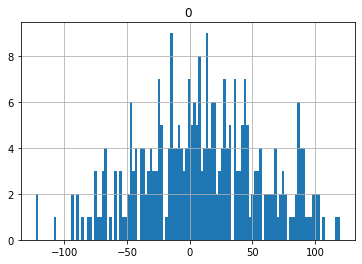

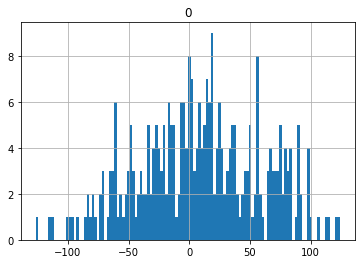

In [24]:
pd.DataFrame(A).hist(bins=120)
pd.DataFrame(B).hist(bins=120)

In [26]:
# Two-sample T-test
st.ttest_ind(A,B, equal_var = False)

Ttest_indResult(statistic=0.33196234898293125, pvalue=0.7400341626811637)

При уровне значимости 0.05 различия являются случайностью, мы не можем отвергнуть нулевую гипотезу. Различия станут значимыми при уровне значимости 0.75

#### Вариант 2

In [29]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

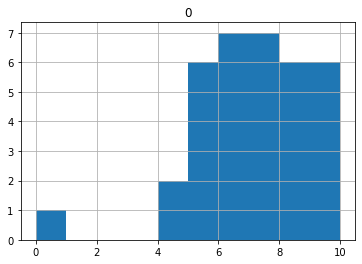

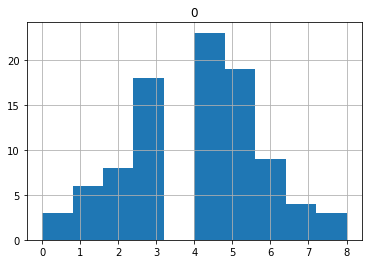

In [30]:
pd.DataFrame(data_1).hist(bins=10)
pd.DataFrame(data_2).hist(bins=10)

In [31]:
st.ttest_ind(data_1,data_2, equal_var = False)

Ttest_indResult(statistic=7.068404675178226, pvalue=2.4974180382616264e-09)

При уровне значимости 0.05 различия не являются случайностью, мы можем отвергнуть нулевую гипотезу. Различия перестанут быть значимыми при alpha 0.0000000025.